<a href="https://colab.research.google.com/github/AbidYousuf/Abid-Yousuf/blob/main/Multi_TaskLearning_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
emotion_df=pd.read_csv('/content/emotions.csv')

In [ ]:
emotion_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4.0
1,1,ive enjoyed being able to slouch about relax a...,0.0
2,2,i gave up my internship with the dmrg and am f...,4.0
3,3,i dont know i feel so lost,0.0
4,4,i am a kindergarten teacher and i am thoroughl...,4.0


In [ ]:
violence_df = pd.read_csv('/content/violence.csv')

In [ ]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [ ]:
hate_df =pd.read_csv('/content/hatespeech.csv')

In [ ]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**Data Preprocessing**

In [ ]:
emotion_df.drop(columns=['Unnamed: 0'],inplace=True)
violence_df.drop(columns=['Tweet_ID'],inplace=True)
hate_df=hate_df[['tweet','class']]

In [ ]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4.0
1,ive enjoyed being able to slouch about relax a...,0.0
2,i gave up my internship with the dmrg and am f...,4.0
3,i dont know i feel so lost,0.0
4,i am a kindergarten teacher and i am thoroughl...,4.0


In [ ]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [ ]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
violence_df.rename(columns={'tweet':'text','type':'label'},inplace=True)
hate_df.rename(columns={'tweet':'text','class':'label'},inplace=True)

In [ ]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4.0
1,ive enjoyed being able to slouch about relax a...,0.0
2,i gave up my internship with the dmrg and am f...,4.0
3,i dont know i feel so lost,0.0
4,i am a kindergarten teacher and i am thoroughl...,4.0


In [ ]:
violence_df.head()

,text,label
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [ ]:
hate_df.head()

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [ ]:
emotion_df.columns,violence_df.columns,hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [ ]:
#Checking the Null Values
emotion_df.isna().sum(),violence_df.isna().sum(),hate_df.isna().sum()

(text     0
 label    1
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [ ]:
# Drop rows with missing values
emotion_df.dropna(subset=['text', 'label'], inplace=True)


In [ ]:
emotion_df.isna().sum()

,0
text,0
label,0


In [ ]:
emotion_df.shape,violence_df.shape,hate_df.shape

((136720, 2), (39650, 2), (24783, 2))

In [ ]:
emotion_df['label'].value_counts()

,count
label,
1.0,46192
0.0,40166
3.0,18652
4.0,15512
2.0,11244
5.0,4954


In [ ]:
e_df = pd.DataFrame()
for i in range(6):
  subset = emotion_df[emotion_df['label'] == i].sample(n = 2000, random_state = 42)
  e_df = pd.concat([e_df, subset])

In [ ]:
e_df['label'].value_counts()

,count
label,
0.0,2000
1.0,2000
2.0,2000
3.0,2000
4.0,2000
5.0,2000


In [ ]:
e_df.shape

(12000, 2)

In [ ]:
emotion_df = e_df.copy()
emotion_df.shape

(12000, 2)

In [ ]:
violence_df['label'].value_counts()

,count
label,
sexual_violence,32648
Physical_violence,5946
emotional_violence,651
economic_violence,217
Harmful_Traditional_practice,188


In [ ]:
sexual_violence = violence_df[violence_df['label'] == 'sexual_violence'].sample(n = 4998, random_state = 42)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']

In [ ]:
violence_df.shape,sexual_violence.shape

((7002, 2), (4998, 2))

In [ ]:
violence_df = pd.concat([sexual_violence, violence_df], axis = 0)

In [ ]:
violence_df.shape

(12000, 2)

In [ ]:
hate_df['label'].value_counts()

,count
label,
1,19190
2,4163
0,1430


In [ ]:
offensive_speech = hate_df[hate_df['label'] == 1].sample(n = 6407, random_state = 42)
hate_df = hate_df[hate_df['label'] != 1]

In [ ]:
offensive_speech.shape, hate_df.shape

((6407, 2), (5593, 2))

In [ ]:
hate_df = pd.concat([offensive_speech, hate_df], axis = 0)

In [ ]:
hate_df.shape

(12000, 2)

In [ ]:
#reset index
emotion_df.reset_index(drop = True, inplace = True)
violence_df.reset_index(drop = True, inplace = True)
hate_df.reset_index(drop = True, inplace = True)

In [ ]:
emotion_df.head()

,text,label
0,im back because i feel terrible,0.0
1,i feel bad then for not accepting who i am,0.0
2,i had been na ve to think no feelings would be...,0.0
3,i feel like i would be very ungrateful if i fo...,0.0
4,i feel rotten reddit newwindow script type tex...,0.0


In [ ]:
violence_df.head()

,text,label
0,My cousin was raped by this guy Matthew. She w...,sexual_violence
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,sexual_violence
2,I remember how I almost got raped like it was ...,sexual_violence
3,He raped me 👈,sexual_violence
4,"A woman raped by A male: psychological horror,...",sexual_violence


In [ ]:
hate_df.head()

,text,label
0,Why is it everytime I go to cracker barrel the...,1
1,"Run that nigga, you don't want that nigga, but...",1
2,I need a girl from Jamaica I can't fuck with t...,1
3,RT @ShadowBeatz_Inc: I know you have me blocke...,1
4,Put ya hands up if you a Grade A bitch,1


**Label Encoding**

In [ ]:
violence_df['label'].unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [ ]:
violence_df.head()

,text,label
0,My cousin was raped by this guy Matthew. She w...,4
1,HAHAHAHAHAHAHHA I DIDN’T SEE IT THE FIRST TIME...,4
2,I remember how I almost got raped like it was ...,4
3,He raped me 👈,4
4,"A woman raped by A male: psychological horror,...",4


In [ ]:
violence_df['label'].unique()

array([4, 1, 3, 0, 2])

0 : Harmful_Traditional_practice
1 : Physical_violence
2 : economic_violence
3 : emotional_violence
4 : sexual_violence

***Stop words Removal ***

In [ ]:
#downloading the stopwords and punctuations
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#load the stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
len(stop_words)

179

In [ ]:
#function to remove stopwords
def remove_stopwords(text):
  all_words = nltk.word_tokenize(text)
  filtered_words = [word for word in all_words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hate_df['text'] = hate_df['text'].apply(remove_stopwords)

In [ ]:
emotion_df.head()

,text,label
0,im back feel terrible,0.0
1,feel bad accepting,0.0
2,na think feelings would hurt eventually quest ...,0.0
3,feel like would ungrateful focused things dont...,0.0
4,feel rotten reddit newwindow script type text ...,0.0


**Tokenization & Padding**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hate_df['text']]))

In [ ]:
emotion_sequences = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [ ]:
emotion_df['text'].iloc[2]  #11 words

'na think feelings would hurt eventually quest pursue causal strings attached relationship'

In [ ]:
emotion_sequences[2:3]  #11 corresponding numeric tokens

[[91, 39, 239, 20, 387, 1486, 6871, 5526, 17291, 7876, 3648, 382]]

In [ ]:
max_length = 50
emotion_padded = pad_sequences(emotion_sequences, maxlen=max_length, padding='post')
violence_padded = pad_sequences(violence_sequences, maxlen=max_length, padding='post')
hate_padded = pad_sequences(hate_sequences, maxlen=max_length, padding='post')

In [ ]:
emotion_padded[2:3]

array([[   91,    39,   239,    20,   387,  1486,  6871,  5526, 17291,
         7876,  3648,   382,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [ ]:
# generating labels in numpy array format
emotion_labels = np.array(emotion_df['label'])
violence_labels = np.array(violence_df['label'])
hate_labels = np.array(hate_df['label'])

**Model Definintion**

In [ ]:
# Prepare separate inputs for each dataset
emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [ ]:
#Define multiple input layers for each task
emotion_input_layer = keras.layers.Input(shape=(max_length,), name='emotion_input')
violence_input_layer = keras.layers.Input(shape=(max_length,), name='violence_input')
hate_input_layer = keras.layers.Input(shape=(max_length,), name='hate_input')

In [ ]:
# Use a shared embedding layer
embedding_layer = keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)
#output_dim=128 : Means each input will be represented using a vector of 128 dimension

In [ ]:
# Apply the embedding layer to each input
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [ ]:
# Shared LSTM layer
shared_lstm = keras.layers.LSTM(64, return_sequences=True)

In [ ]:
len(emotion_df['label'].unique()), len(violence_df['label'].unique()), len(hate_df['label'].unique())

(6, 5, 3)

In [ ]:
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [ ]:
# Shared GlobalAveragePooling and Dropout layers
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)


In [ ]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [ ]:
# Output layers for each task
emotion_output = keras.layers.Dense(6, activation='softmax', name='emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5, activation='softmax', name='violence_output')(violence_features)
hate_output = keras.layers.Dense(3, activation='softmax', name='hate_output')(hate_features)

In [ ]:
# Compile the model with multiple inputs and outputs
model = keras.models.Model(inputs=[emotion_input_layer, violence_input_layer, hate_input_layer],
                           outputs=[emotion_output, violence_output, hate_output])

model.compile(optimizer = 'adam',
              loss = {
                  'emotion_output' : 'sparse_categorical_crossentropy',
                  'violence_output' : 'sparse_categorical_crossentropy',
                  'hate_output' : 'sparse_categorical_crossentropy',
              },
              metrics = {
                  'emotion_output' : 'accuracy',
                  'violence_output' : 'accuracy',
                  'hate_output' : 'accuracy',
              })

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ emotion_input             │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ violence_input            │ (None, 50)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hate_input (InputLayer)   │ (None, 50)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 50, 128)        │      5,351,936 │ emotion_input[0][0],   │
│                           │                        │                │ violence_input[0][0],  │
│                           │                        │                │ hate_input[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ (None, 50, 64)         │         49,408 │ embedding[0][0],       │
│                           │                        │                │ embedding[1][0],       │
│                           │                        │                │ embedding[2][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 64)             │              0 │ lstm[0][0],            │
│ (GlobalAveragePooling1D)  │                        │                │ lstm[1][0], lstm[2][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64)             │              0 │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
│                           │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ emotion_output (Dense)    │ (None, 6)              │            390 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ violence_output (Dense)   │ (None, 5)              │            325 │ dropout[1][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ hate_output (Dense)       │ (None, 3)              │            195 │ dropout[2][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,402,254 (20.61 MB)

 Trainable params: 5,402,254 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with separate inputs
model.fit(x={'emotion_input': emotion_input,
             'violence_input': violence_input,
             'hate_input': hate_input},
          y={'emotion_output': emotion_labels,
             'violence_output': violence_labels,
             'hate_output': hate_labels},
          epochs=10,
          batch_size=16)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 112s 143ms/step - emotion_output_accuracy: 0.2022 - hate_output_accuracy: 0.6430 - loss: 3.6236 - violence_output_accuracy: 0.5211
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 145ms/step - emotion_output_accuracy: 0.3511 - hate_output_accuracy: 0.7639 - loss: 2.8965 - violence_output_accuracy: 0.6974
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 143ms/step - emotion_output_accuracy: 0.6868 - hate_output_accuracy: 0.7805 - loss: 1.9679 - violence_output_accuracy: 0.8026
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 107s 142ms/step - emotion_output_accuracy: 0.9506 - hate_output_accuracy: 0.7933 - loss: 1.1748 - violence_output_accuracy: 0.8505
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 140ms/step - emotion_output_accuracy: 0.9667 - hate_output_accuracy: 0.8403 - loss: 0.8365 - violence_output_accuracy: 0.8983
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 140ms/step - emotion_output_accuracy: 0.9727 - hate_output_accuracy: 0.8713 - loss: 0.6544 - violenc

In [ ]:
model.save('MultiTask.keras')

In [ ]:
from tensorflow.keras.models import load_model
# Load the model
model = load_model('MultiTask.keras')


**Prediction and Evaluation**

In [ ]:
# Provide all inputs for prediction
predictions = model.predict({'emotion_input': emotion_input,
                             'violence_input': violence_input,
                             'hate_input': hate_input})

375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step


In [ ]:
# Extract predictions for each task
emotion_pred = np.argmax(predictions[0], axis=1)
violence_pred = np.argmax(predictions[1], axis=1)
hate_pred = np.argmax(predictions[2], axis=1)

In [ ]:
emotion_df['label'].unique()
'''
0 : Sadness
1 : Joy
2 : Love
3 : Anger
4 : Fear
5 : Surprise'''

'\n0 : Sadness\n1 : Joy\n2 : Love\n3 : Anger\n4 : Fear\n5 : Surprise'

In [ ]:
violence_df['label'].unique()
'''
0 : Harmful_Traditional_practice
1 : Physical_violence
2 : economic_violence
3 : emotional_violence
4 : sexual_violence'''

'\n0 : Harmful_Traditional_practice\n1 : Physical_violence\n2 : economic_violence\n3 : emotional_violence\n4 : sexual_violence'

In [ ]:
hate_df['label'].unique()
'''
0 : Hate Speech
1 : Offensive Speech
2 : Neither'''

'\n0 : Hate Speech\n1 : Offensive Speech\n2 : Neither'

In [ ]:
def plot_confusion_matrix(true, pred, title, labels):
  cf = confusion_matrix(true, pred, normalize = 'true')
  plt.figure(figsize = (7,6))
  sns.heatmap(cf, annot = True, cmap = 'Blues', xticklabels=labels, yticklabels=labels)
  plt.title(title)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

#creating text labels
emotion_labels_text = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
violence_labels_text = ['sexual_violence', 'Physical_violence', 'emotional_violence', 'Harmful_Traditional_practice', 'economic_violence']
hate_labels_text = ['Offensive Speech', 'Neither', 'Hate Speech']

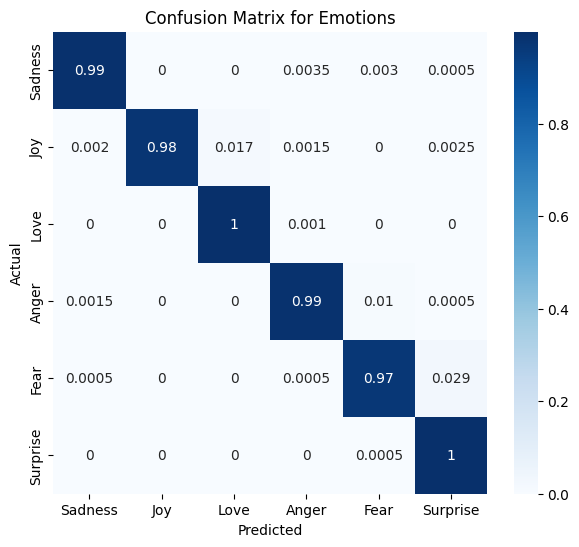

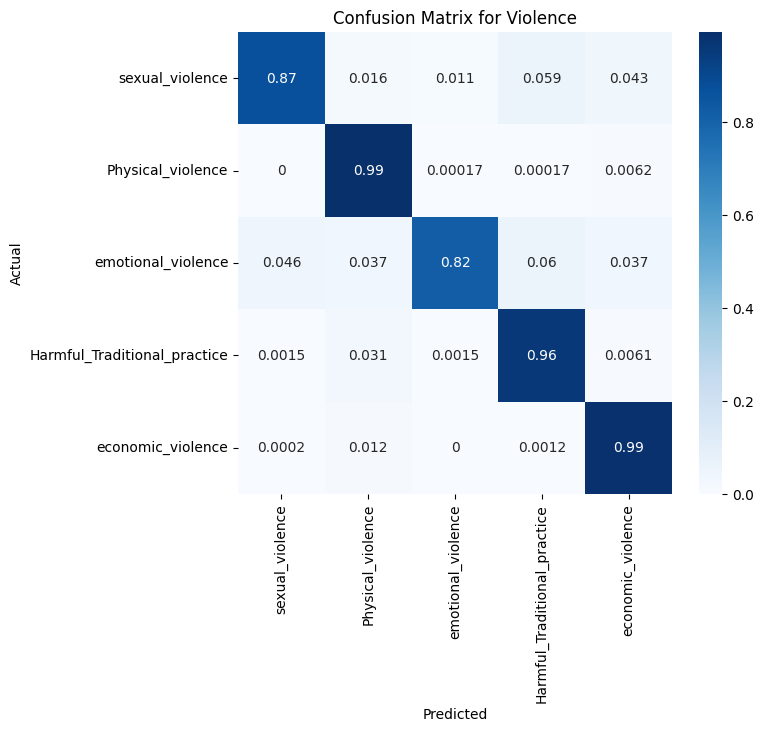

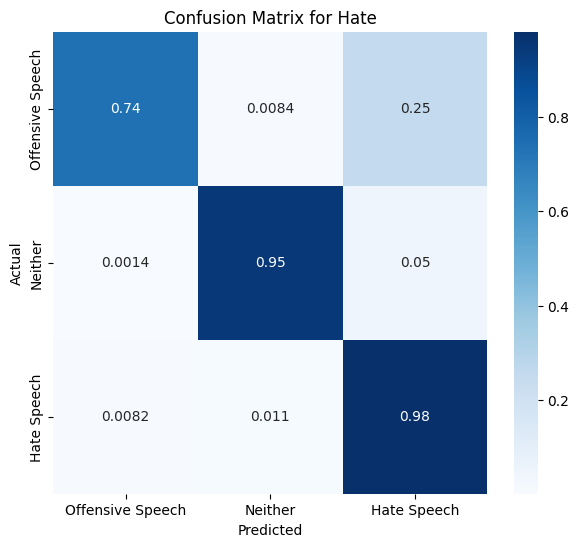

In [ ]:
# Plotting confusion matrices
plot_confusion_matrix(emotion_labels, emotion_pred, 'Confusion Matrix for Emotions', emotion_labels_text)
plot_confusion_matrix(violence_labels, violence_pred, 'Confusion Matrix for Violence', violence_labels_text)
plot_confusion_matrix(hate_labels, hate_pred, 'Confusion Matrix for Hate', hate_labels_text)

**Manual Testing**

In [ ]:
def classify_text(input_text):
    # Preprocess input text
    input_text_cleaned = remove_stopwords(input_text)
    input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
    input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post')

    # Predict major label and sub-labels
    predictions = model.predict({'emotion_input': input_padded,
                                 'violence_input': input_padded,
                                 'hate_input': input_padded})

    # Extract predictions for each task
    emotion_pred = np.argmax(predictions[0], axis=1)[0]
    violence_pred = np.argmax(predictions[1], axis=1)[0]
    hate_pred = np.argmax(predictions[2], axis=1)[0]

    # Determine major label
    major_labels = ['Emotion', 'Violence', 'Hate']
    # Assuming you have some logic to choose the major label based on highest confidence
    major_label_index = np.argmax([np.max(predictions[0]), np.max(predictions[1]), np.max(predictions[2])])
    major_label = major_labels[major_label_index]

    # Map predictions to label names
    emotion_labels_text = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
    violence_labels_text = ['sexual_violence', 'Physical_violence', 'emotional_violence', 'Harmful_Traditional_practice', 'economic_violence']
    hate_labels_text = ['Offensive Speech', 'Neither', 'Hate Speech']

    if major_label == 'Emotion':
        sub_label = emotion_labels_text[emotion_pred]
    elif major_label == 'Violence':
        sub_label = violence_labels_text[violence_pred]
    else:
        sub_label = hate_labels_text[hate_pred]

    return major_label, sub_label

# text = "I am afraid"
# major_label, sub_label = classify_text(text)
# print(f"Major Label: {major_label}")
# print(f"Sub Label: {sub_label}")

In [ ]:
import ipywidgets as widgets
from IPython.display import display
#Define a text input widget
input_text_widget = widgets.Text(
    description = 'Input text : ',
    placeholder = 'Enter you text here'
)

In [ ]:
#define a button widget
button = widgets.Button(description = 'Classify')

In [ ]:
#define an output area to display the result
output = widgets.Output()

In [ ]:
#function to handle event
def on_button_click(b):
  with output:
    output.clear_output() #clear previous output
    input_text = input_text_widget.value
    major_label, sub_label = classify_text(input_text)
    print(f'Major Label : {major_label}')
    print(f'Sub Label : {sub_label}')

#attach the button click event
button.on_click(on_button_click)

In [ ]:
display(input_text_widget, button, output)

Text(value='', description='Input text : ', placeholder='Enter you text here')

Button(description='Classify', style=ButtonStyle())

Output()